In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# проанализируем данные по транзакциям, которые осуществляют пользователи
df = pd.read_csv('transaction_data.csv')
df.head(5)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [3]:
print(f'В датафрейме {df.shape[0]} строк и {df.shape[1]} столбцов\n')
print(f'Типы переменных\n{df.dtypes}\n')
print(f'Описательные статистики\n{df.describe()}')

В датафрейме 5315 строк и 3 столбцов

Типы переменных
date           object
name           object
transaction    object
dtype: object

Описательные статистики
                       date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692


In [4]:
# выясним - есть ли у нас пропущенные значения
df.isnull().sum().sum()

0

In [ ]:
# Оценим столбец transaction

In [5]:
# Посмотрим, какие значения принимает переменная
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [6]:
transac_count = df.groupby('transaction', as_index=False) \
    .agg({'name': 'count'}) \
    .sort_values('name') \
    .rename(columns={'name': 'count'})
transac_count

,transaction,count
1,error,4
0,cancelled,1619
2,successfull,3692


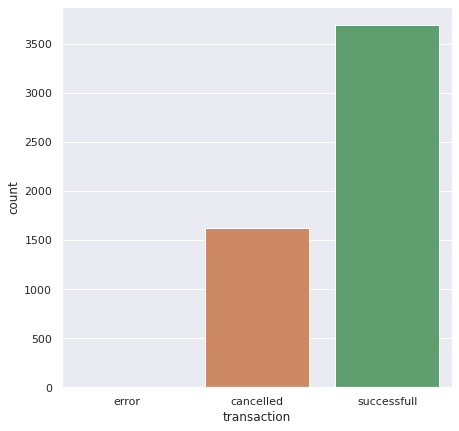

In [7]:
# Визуализируем
sns.set(rc={'figure.figsize': (7, 7)})
ax = sns.barplot(x='transaction', y='count', data=transac_count)

In [10]:
# Посчитаем, сколько успешных транзакций осуществил каждый пользователь
df_success = df.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'transaction': 'count'})
df_success.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


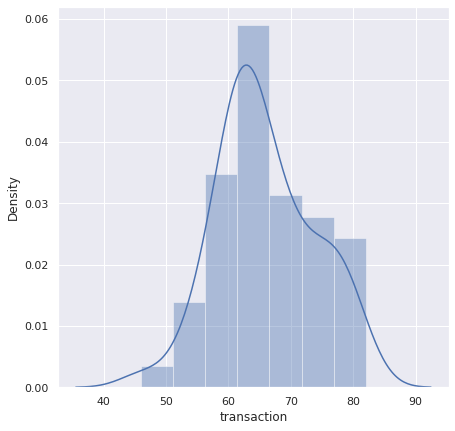

In [12]:
# построим гистограмму числа успешных транзакций, совершённых каждым пользователем
# по оси x - число транзакций
# по оси y - плотность распределения
ax = sns.distplot(df_success.transaction)

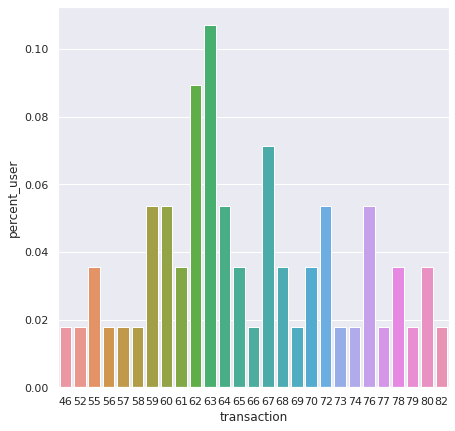

In [46]:
# сгруппируем юзеров по кол-ву транзакций
# по каждой группе юзеров рассчитаем долю от общего числа пользователей
# построим график
df_success_transac = df_success.groupby('transaction', as_index=False) \
    .agg({'name': 'count'}) \
    .rename(columns={'name': 'percent_user'})
df_success_transac.percent_user = df_success_transac.percent_user / df_success_transac.percent_user.sum()
ax = sns.barplot(x='transaction', y='percent_user', data=df_success_transac)

In [ ]:
# К нам пришёл коллега с немного обновленными данными. Построим сводную таблицу, где
# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций

In [13]:
df_2 = pd.read_csv('transaction_data_updated.csv')
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [14]:
print(f'В датафрейме {df_2.shape[0]} строк и {df_2.shape[1]} столбцов\n')
print(f'Типы переменных\n{df_2.dtypes}\n')
print(f'Описательные статистики\n{df_2.describe()}\n')
print(f'В файле {df_2.isnull().sum().sum()} пропущенных значений')

В датафрейме 5315 строк и 4 столбцов

Типы переменных
date           object
name           object
transaction    object
minute          int64
dtype: object

Описательные статистики
            minute
count  5315.000000
mean     24.622389
std      16.649462
min       0.000000
25%      11.000000
50%      22.000000
75%      37.000000
max      59.000000

В файле 0 пропущенных значений


In [15]:
# строим сводную таблицу
user_vs_minute_pivot = df_2.groupby(['minute', 'name'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [16]:
# у нас некорректность в загруженных данных - в столбце minute число минут из даты транзакции date, 
# а не число минут с начала дня. Исправим это и добавим корректные данные в новую колонку true_minute
df_2 = df_2.assign(true_minute = pd.to_datetime(df_2.date).dt.hour * 60 + df_2.minute)
df_2.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


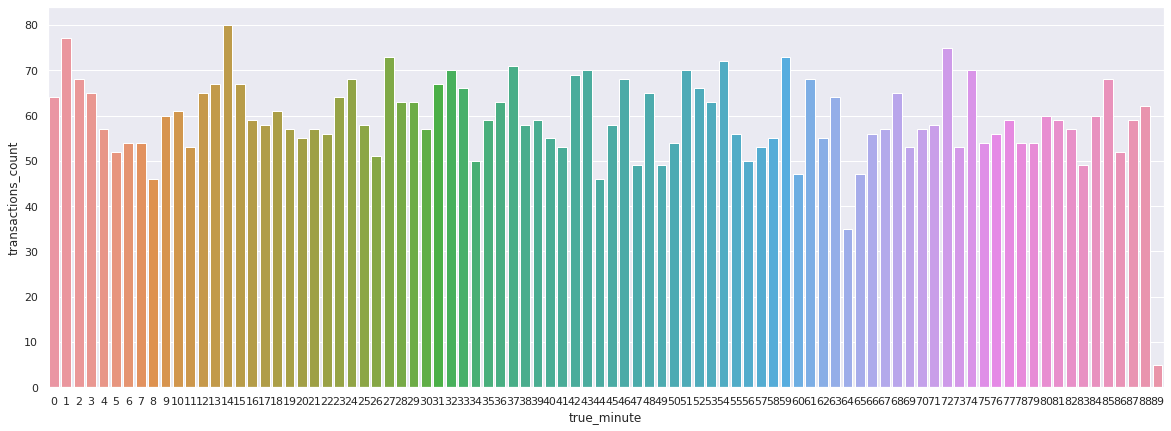

In [18]:
# перестроим сводную таблицу и построим по ней поминутный график транзакций
sns.set(rc={'figure.figsize': (20, 7)})
user_vs_minute_pivot_2 = df_2.groupby(['true_minute', 'name'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='true_minute', columns='name', values='transaction') \
    .fillna(0).reset_index()
user_vs_minute_pivot_2['transactions_count'] = user_vs_minute_pivot_2.iloc[:, 1:].sum(axis=1) # вычисление построчной суммы
ax = sns.barplot(x='true_minute', y='transactions_count', data=user_vs_minute_pivot_2)